# 第3章 分類問題
# -- 機械学習ライブラリscikit-learnの活用

- ロジスティック回帰、サポートベクトルマシン、決定木
- scikit-learn　機械学習ライブラリに基づく例と説明。
- 線形、非線形の決定領域を持つ分類機の長所と短所


# 3.1 分類アルゴリズムの選択
1. 特徴量を選択し、トレーニングサンプルを収集
1. 性能指標を選択
1. 分類機と最適化アルゴリズムを選択する
1. モデルの性能評価
1. アルゴリズムを調整



# 3.2 scikit-learn活用へのファーストステップ
# パーセプトロンのトレーニング


- 全章
  - パーセプトロン
  - ADALINE
- この章
  - scikit-learnのAPI
  - さまざまな分類アルゴリズム

#### sklearnのデータセットから Irisデータセットをロード

In [1]:
from sklearn import datasets
import numpy as np

# Iris データセットをロード
iris = datasets.load_iris()
# 3, 4列目の特徴量を抽出　　「萼片の長さ」「花びらの長さ」
X = iris.data[:, [2, 3]]
# 品種のクラスラベルを取得
y = iris.target
# 一意なクラスラベルを出力
print ('Class labels: ', np.unique(y))
print('0: Iris-setosa, 1: Iris-versicolor, 2: Iris-virginica')
# print(X)
# print(y)

Class labels:  [0 1 2]
0: Iris-setosa, 1: Iris-versicolor, 2: Iris-virginica


#### トレーニングデータとテストデータに分割する

In [2]:
from sklearn.model_selection import train_test_split
# トレーニングデータとテストデータに分割
# 全体の30%をテストデータにする 70%はトレーニングデータ
# train_test_split関数はトレーニングセットをシャッフルする
# random_stateは乱数シード
# stratify=y は層化サンプリング
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
# stratifyによってトレーニングサブセットとテストサブセットのクラスラベルの比率が
# 入力データセットと同じであるか確認してみる
print(y)
print('Labels counts in y: ', np.bincount(y), '\n')

print(y_train)
print('Labels counts in y_train: ', np.bincount(y_train), '\n')

print(y_test)
print('Labels counts in y_test: ', np.bincount(y_test), '\n')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Labels counts in y:  [50 50 50] 

[0 0 2 2 0 2 2 0 2 1 1 1 0 1 1 2 0 1 1 0 2 2 1 1 1 2 1 2 2 2 1 0 2 2 2 2 1
 2 2 0 2 0 2 0 0 1 0 0 2 1 0 1 1 0 0 0 1 2 0 1 0 1 2 0 0 1 2 1 1 1 2 1 1 2
 2 1 0 0 2 1 2 2 0 1 2 2 0 0 2 0 2 1 1 1 0 2 1 0 0 1 0 1 0 0 0]
Labels counts in y_train:  [35 35 35] 

[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]
Labels counts in y_test:  [15 15 15] 



#### 特徴量の標準化

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

print(X_train, "\n\n")
# トレーニングデータの平均と標準偏差を計算
sc.fit(X_train)

# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std, "\n\n")
print(X_test_std, "\n\n")

[[ 1.4  0.2]
 [ 1.7  0.2]
 [ 5.3  2.3]
 [ 5.7  2.1]
 [ 1.2  0.2]
 [ 5.6  2.4]
 [ 6.6  2.1]
 [ 1.2  0.2]
 [ 5.8  1.6]
 [ 4.6  1.3]
 [ 3.3  1. ]
 [ 3.9  1.4]
 [ 1.3  0.2]
 [ 4.7  1.2]
 [ 4.   1.3]
 [ 5.1  1.9]
 [ 1.9  0.2]
 [ 3.5  1. ]
 [ 3.9  1.2]
 [ 1.6  0.2]
 [ 4.8  1.8]
 [ 6.9  2.3]
 [ 4.5  1.5]
 [ 4.5  1.3]
 [ 3.8  1.1]
 [ 5.6  2.4]
 [ 4.7  1.4]
 [ 5.6  1.4]
 [ 5.8  2.2]
 [ 5.1  2.4]
 [ 4.1  1.3]
 [ 1.5  0.4]
 [ 6.7  2.2]
 [ 5.   1.9]
 [ 4.8  1.8]
 [ 5.6  2.1]
 [ 4.2  1.5]
 [ 6.7  2. ]
 [ 5.5  1.8]
 [ 1.6  0.2]
 [ 4.9  1.8]
 [ 1.4  0.2]
 [ 5.1  1.5]
 [ 1.9  0.4]
 [ 1.   0.2]
 [ 4.9  1.5]
 [ 1.5  0.1]
 [ 1.1  0.1]
 [ 5.5  1.8]
 [ 4.7  1.5]
 [ 1.7  0.3]
 [ 3.5  1. ]
 [ 4.1  1. ]
 [ 1.5  0.2]
 [ 1.5  0.2]
 [ 1.5  0.2]
 [ 3.7  1. ]
 [ 6.1  2.5]
 [ 1.3  0.3]
 [ 4.9  1.5]
 [ 1.3  0.2]
 [ 4.5  1.6]
 [ 6.   1.8]
 [ 1.6  0.2]
 [ 1.4  0.2]
 [ 4.4  1.2]
 [ 5.1  1.9]
 [ 3.6  1.3]
 [ 4.1  1.3]
 [ 4.8  1.8]
 [ 6.1  2.3]
 [ 4.5  1.5]
 [ 4.5  1.5]
 [ 5.4  2.1]
 [ 5.6  2.2]
 [ 4.6  1.4]
 [ 1.5  0.4]

#### トレーニング

In [5]:
from sklearn.linear_model import Perceptron
# エポック数 40, 学習率 0.1 で Perceptron のインスタンスを作成
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
# トレーニングデータをモデルに適合させる
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=1, shuffle=True,
      verbose=0, warm_start=False)

#### 予測

In [6]:
# テストデータで予測を実施
y_pred = ppn.predict(X_test_std)
# 誤分類のサンプル個数を表示
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('y_test: ', y_test.sum())
print('y_pred: ', y_pred.sum())

Misclassified samples: 3
y_test:  45
y_pred:  42


In [7]:
from sklearn.metrics import accuracy_score
# 分類の正解率を表示
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


#### 決定領域のプロット

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # マーカーとカラーマップの設定
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # 各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元にグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとにサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # テストサンプルを目立たせる（点を◯で表示）
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

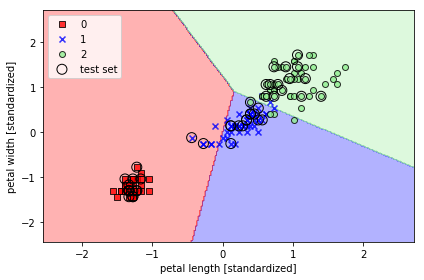

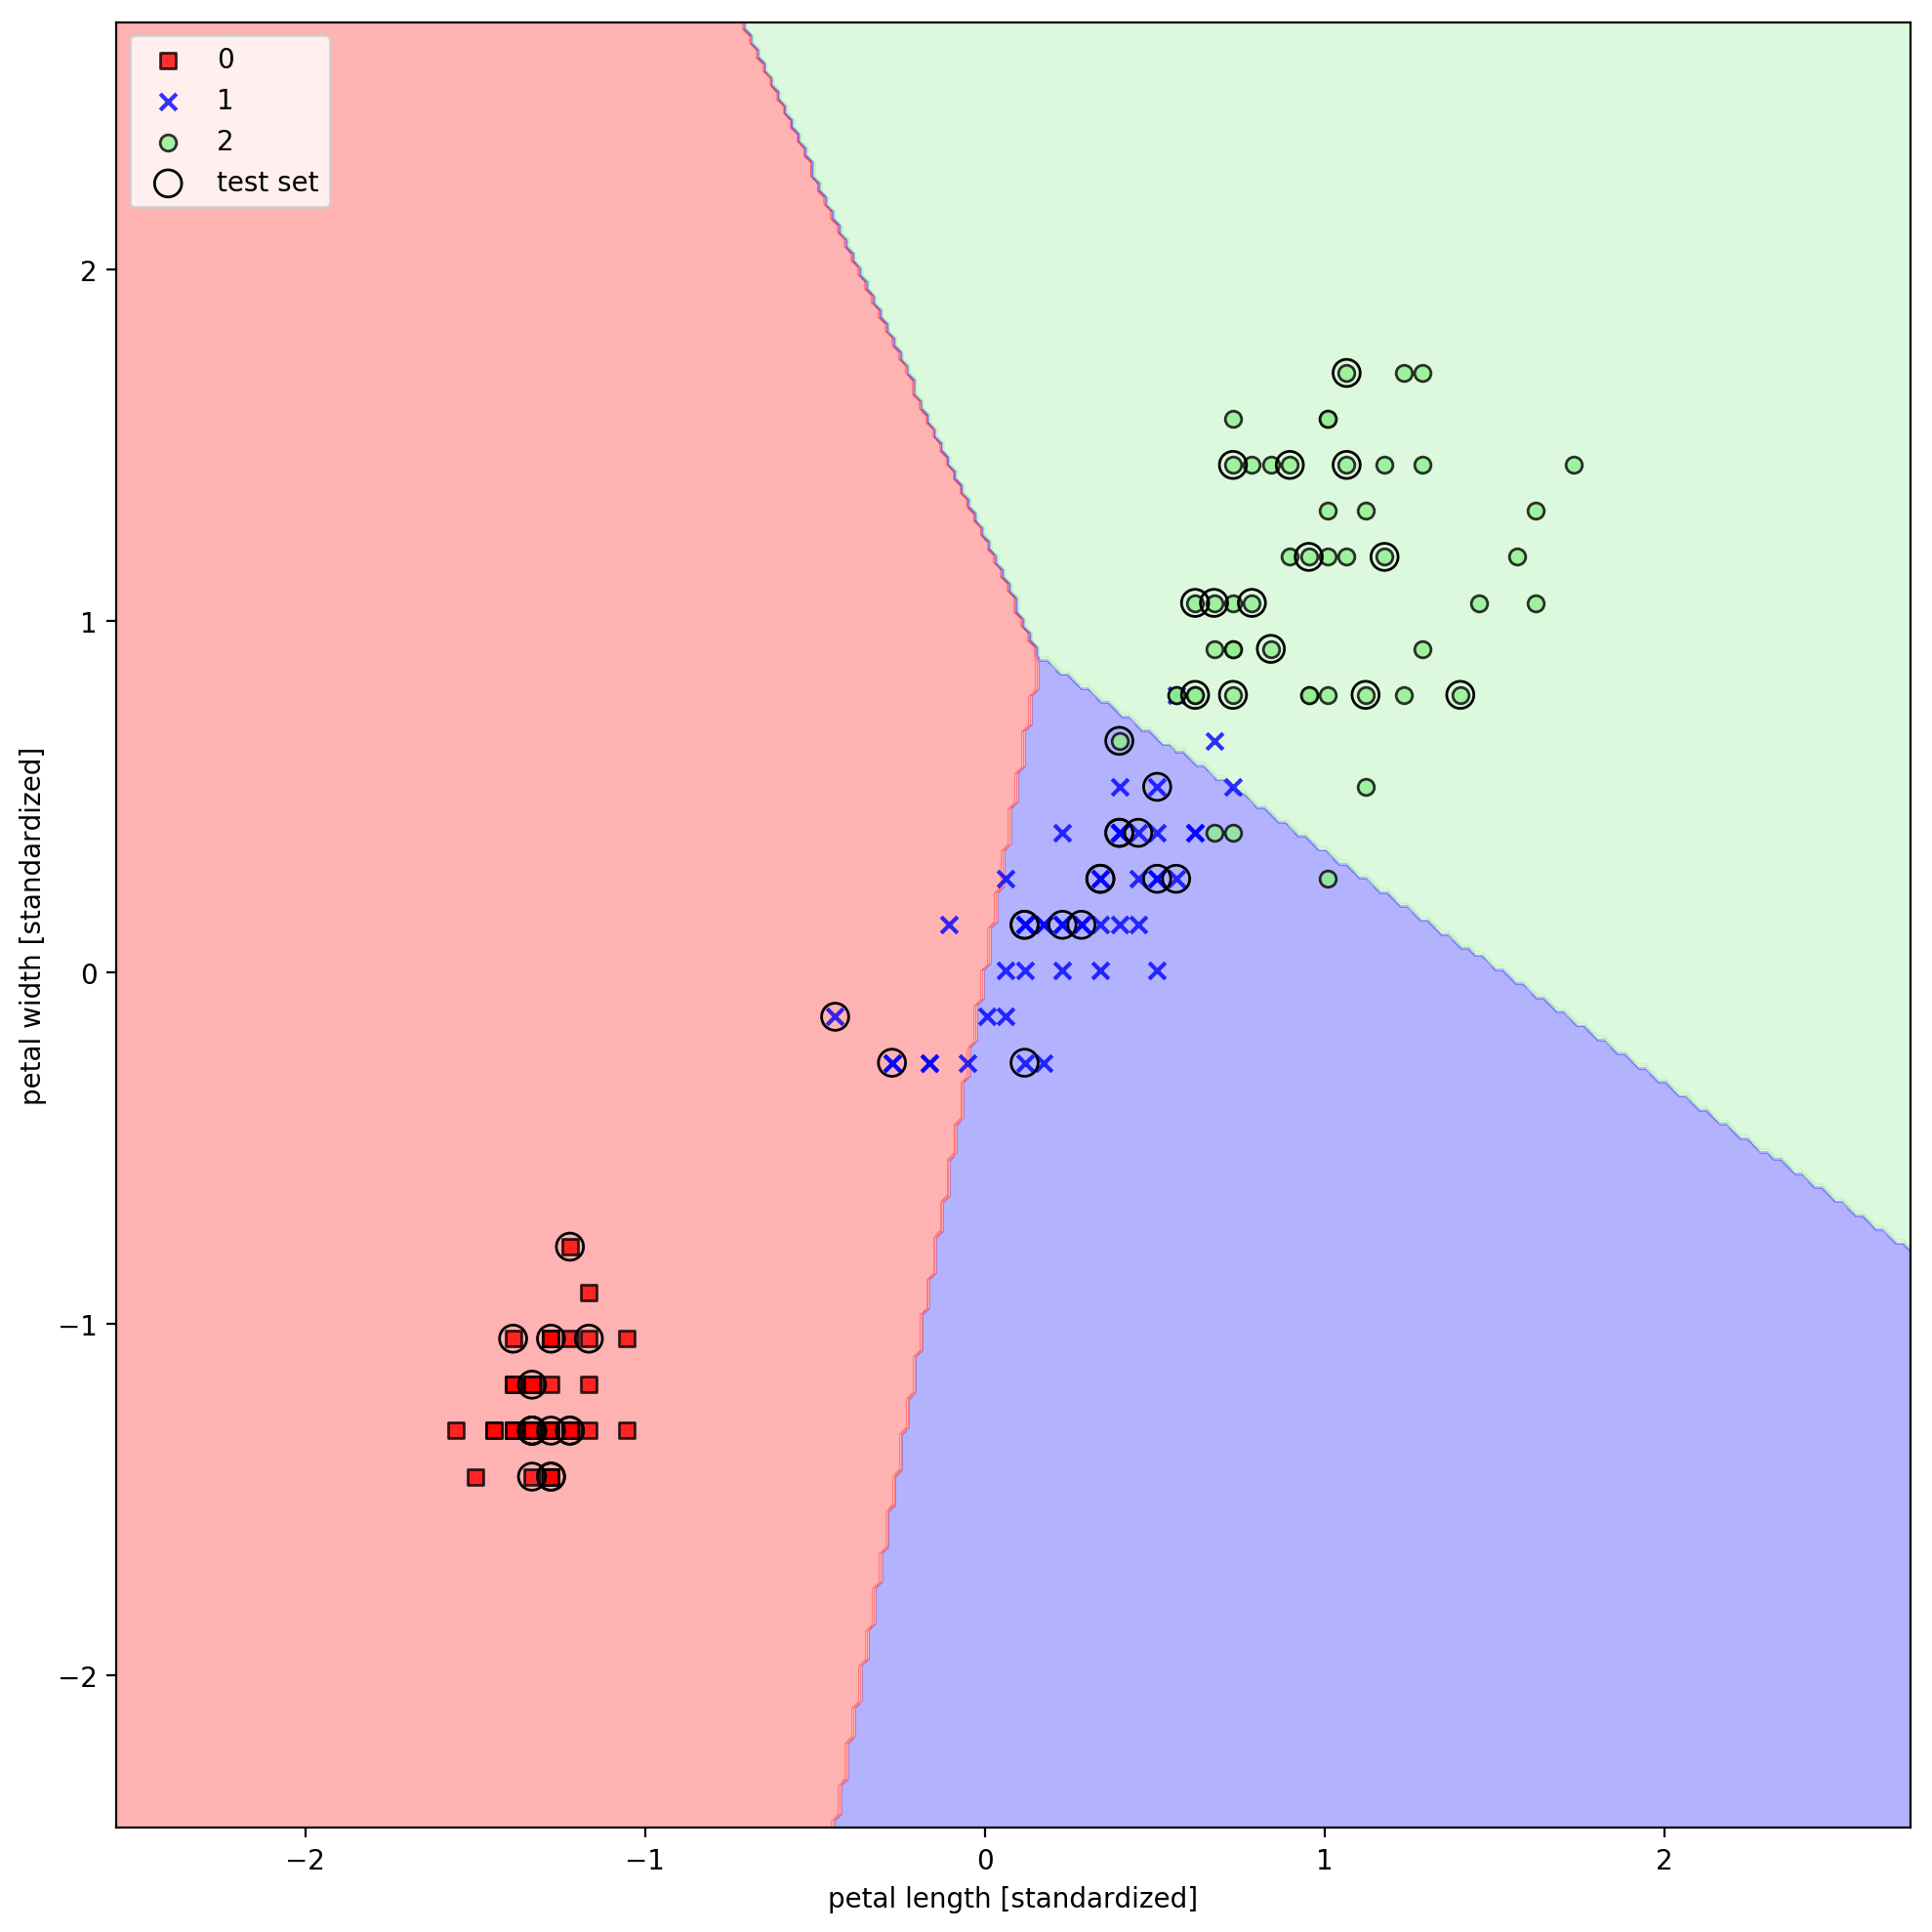

In [11]:
# トレーニングデータとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
# トレーニングデータとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))
# 決定境界のプロット
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))

# 設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.figure(figsize=(8, 6), dpi=80

plt.tight_layout()
plt.show()

# 3.3 ロジスティック回帰を使ってクラスの確率を予測するモデルの構築